<a href="https://colab.research.google.com/github/Erika000o/Redes-Neuronales/blob/main/Perceptr%C3%B3n_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Paso 2 Cargar y preprocesar los datos

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


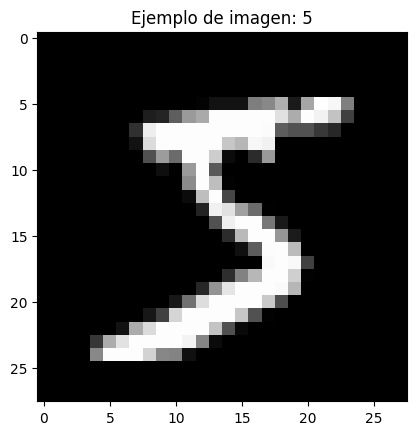

In [9]:
# Cargar el conjunto de datos MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Fixed typo: load_data()
# Normalizar los datos (valores entre ® y 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# Visualizar un ejemplo de los datos
plt.imshow(X_train[0], cmap='gray') #Fixed typo: cmap
plt.title(f'Ejemplo de imagen: {y_train[0]}') #Fixed f-string formatting
plt.show()
# Convertir las etiquetas a formato "one-hot" (10 categorías)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Paso 3: Construir el modelo de Perceptrón Multicapa

In [10]:
# Crear el modelo del Perceptrón Multicapa
model = Sequential()
# Aplanar las imágenes de 28x28 en un vector de 784
model.add(Flatten(input_shape=(28, 28)))
# Añadir la primera capa oculta con 128 neuronas y activación ReLU
model.add(Dense(128, activation='relu'))
# Añadir la segunda capa oculta con 64 neuronas y activación ReLU
model.add(Dense(64, activation= 'relu'))
# Añadir la capa, de salida con 10 neuronas (una por clase) y activación softmax
model.add(Dense(10, activation='softmax'))
# Compilar el modelo con optimizador Adam y función de pérdida categórica
model.compile(optimizer='adam', loss='categorical _crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Paso 4: Entrenar el modelo

In [20]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8800 - loss: 0.4092 - val_accuracy: 0.9599 - val_loss: 0.1312
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9671 - loss: 0.1094 - val_accuracy: 0.9712 - val_loss: 0.0919
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9803 - loss: 0.0657 - val_accuracy: 0.9705 - val_loss: 0.0930
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9841 - loss: 0.0524 - val_accuracy: 0.9728 - val_loss: 0.0850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0376 - val_accuracy: 0.9776 - val_loss: 0.0735
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9777 - val_loss: 0.0741
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9924 - loss: 0.0255 - val_accuracy: 0.9783 - val_loss: 0.0804
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9928 - loss: 0.0210

In [21]:
# Compilar el modelo con optimizador Adam y función de pérdida categórica
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Fixed typo: removed underscore between categorical and crossentropy

#Paso 5: Evaluar el modelo

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.1140
Precisión en el conjunto de prueba: 0.9772


#Paso 6: Visualizar los resultados

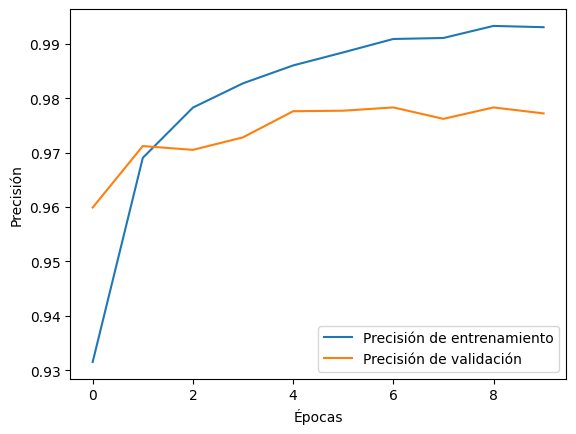

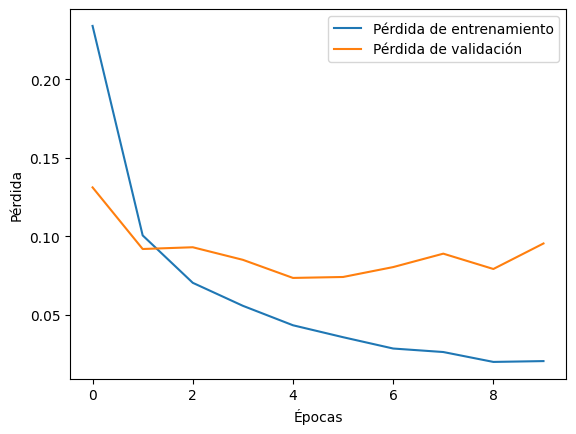

In [23]:
#Grafiar la precision en entrenamineto y validacion
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

#Graficar la perdida en entrenamiento y validacion
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()